In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df_hits = pd.read_csv('data/ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_sessions = pd.read_csv('data/ga_sessions.csv')
df_sessions.head()

C:\Users\almaz\AppData\Local\Temp\ipykernel_3768\2811086100.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('data/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
actions =  ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
                         'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click',
                         'sub_submit_success', 'sub_car_request_submit_click']


In [32]:
df_hits['event_action'].isin(actions)

0           False
1           False
2           False
3           False
4           False
            ...  
15726465    False
15726466    False
15726467    False
15726468    False
15726469    False
Name: event_action, Length: 15726470, dtype: bool

In [40]:
df_hits_target = df_hits[df_hits['event_action'].isin(actions)].copy()
df_hits_target.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,NaN


In [41]:
df_hits_target.event_action.unique()

array(['sub_submit_success', 'sub_car_claim_click',
       'sub_open_dialog_click', 'sub_car_claim_submit_click',
       'sub_car_request_submit_click', 'sub_call_number_click',
       'sub_callback_submit_click', 'sub_custom_question_submit_click'],
      dtype=object)

In [42]:
def print_missing_values(df):
    missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
    print(f'Процент пропущенных значений в колонках:')
    print(missing_values)

In [43]:
print_missing_values(df_hits_target)

Процент пропущенных значений в колонках:
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label         8.729554
hit_referer        32.681969
hit_time           64.443131
event_value       100.000000
dtype: float64


<Axes: >

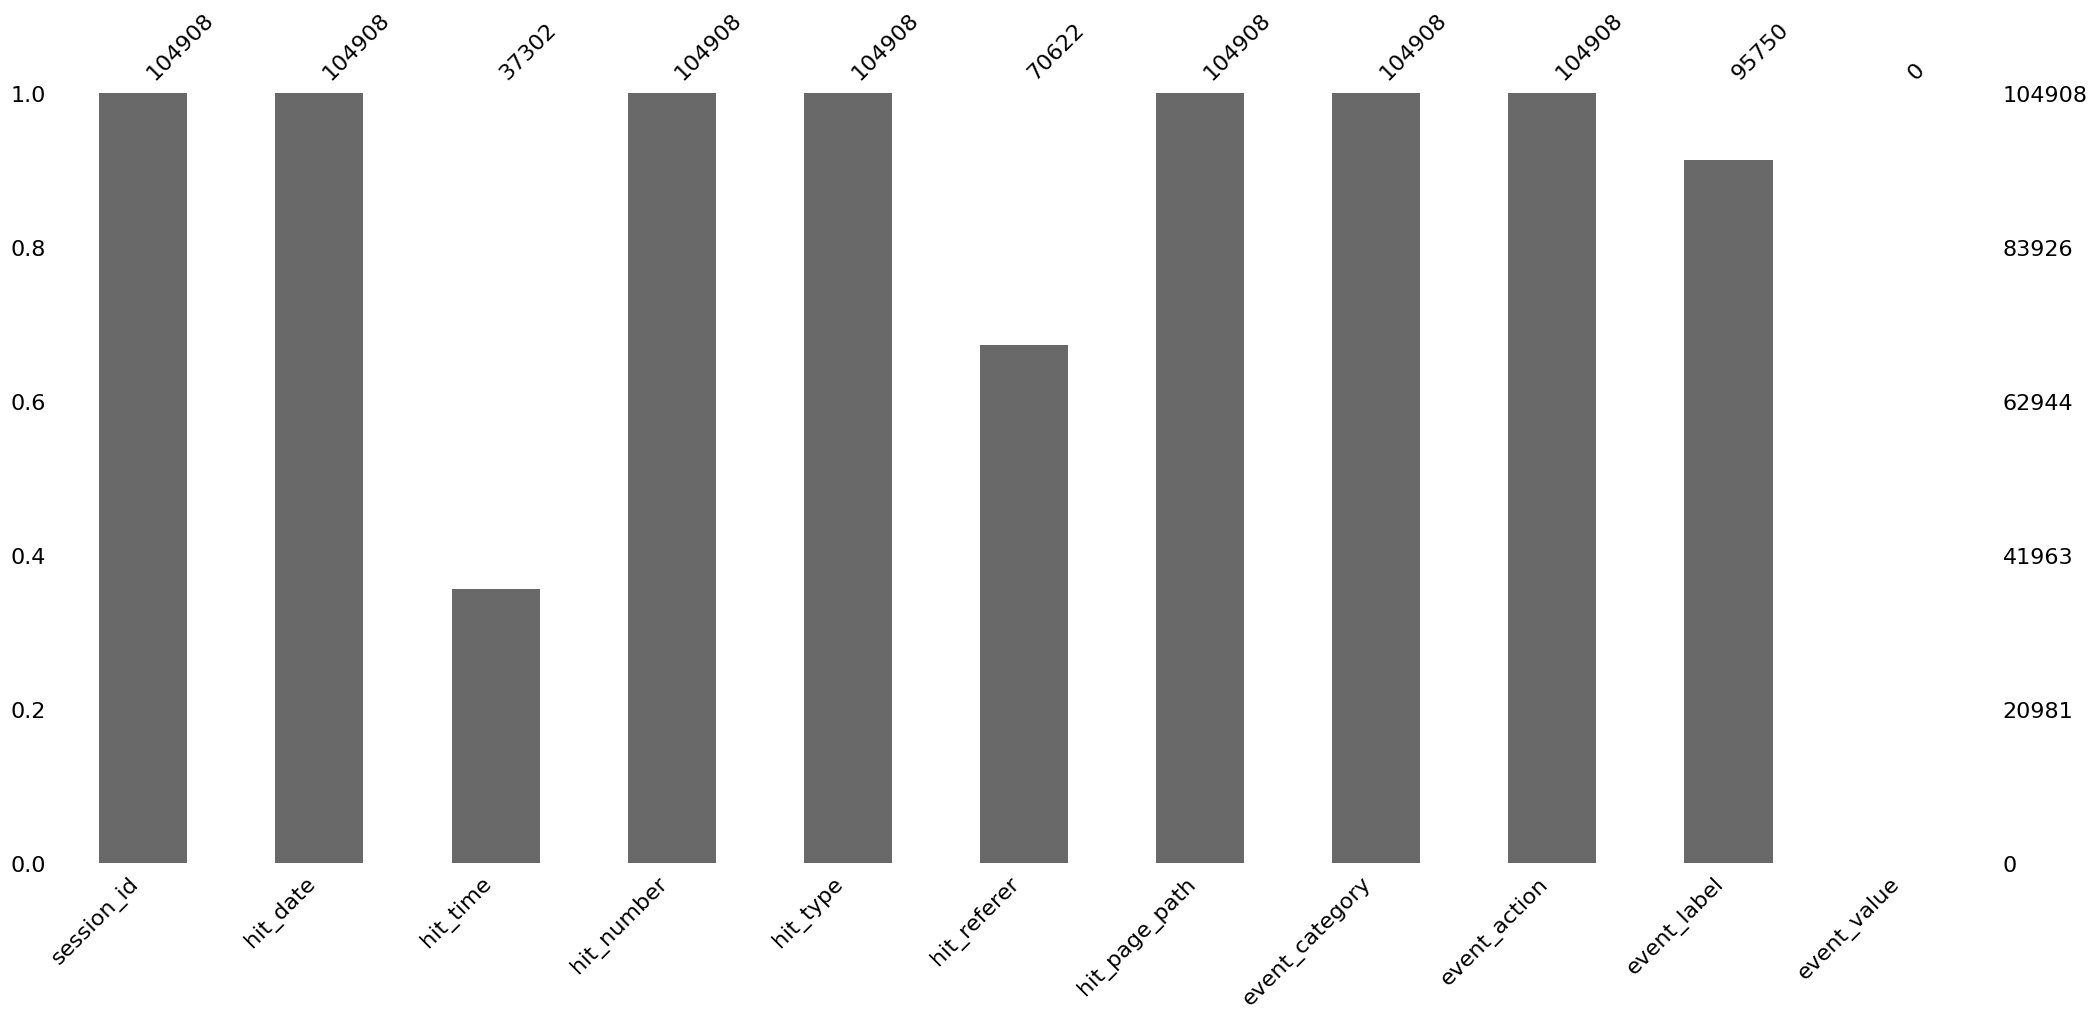

In [44]:
msno.bar(df_hits_target)

In [45]:
df_hits_target.drop('event_value', axis=1, inplace=True)
df_hits_target.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS


In [46]:
df_hits_target.drop('hit_time', axis=1, inplace=True)
df_hits_target.head()

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
4016,2744563715298057088.1640258436.1640258436,2021-12-23,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4045,3087297479839089634.1640268774.1640268774,2021-12-23,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4046,3156966333326004302.1640206419.1640206800,2021-12-23,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4047,3750243879753098158.1640272208.1640272208,2021-12-23,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4048,7518333712042258254.1640258901.1640258901,2021-12-23,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS


In [50]:
df_hits_target.hit_referer.value_counts(dropna = False)

hit_referer
HbolMJUevblAbkHClEQa    63585
NaN                     34286
FwdMTcXzWAwhtsnMAbhS     2173
sAGDBCdeVPmQPwkVEcIX     1294
GQmOLxANuSeCxCanBpMl      539
                        ...  
FMSGtVCVTqFRtZSbdTNW        1
yBoPluUsivvUMcMQsMbl        1
sZeTuTKPVExhtuYrKwbF        1
PiHrMOLwsKzchjrgdmNi        1
EUvxODdJIXHqxsMfjyWL        1
Name: count, Length: 563, dtype: int64

In [51]:
df_hits_target.drop('hit_referer', axis=1, inplace=True)
df_hits_target.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_label
4016,2744563715298057088.1640258436.1640258436,2021-12-23,81,event,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4045,3087297479839089634.1640268774.1640268774,2021-12-23,22,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4046,3156966333326004302.1640206419.1640206800,2021-12-23,63,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4047,3750243879753098158.1640272208.1640272208,2021-12-23,20,event,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF
4048,7518333712042258254.1640258901.1640258901,2021-12-23,16,event,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS


In [52]:
df_hits_target.event_label.value_counts(dropna = False)

event_label
EsLbNNEnCkXWoaesnKlS    35000
DrwJcHfmgRDbfayCKOrQ    13685
KclpemfoHstknWHFiLit    13513
nsPPIRqjxBefONGPpnsF    11980
NaN                      9158
ZaZuwAXOKlbzyhUqtnmk     7213
KuMiABMMbspIDDhiCNVS     6094
uimgZZmhfLQwbKAZZfCk     2972
nzDXtAvtTrzfwscIPQkp     2928
yrNVHowDbZsxjfjrrhyG     2261
ZZofswPTYfyzKOvStgaa      104
Name: count, dtype: int64

In [53]:
df_hits_target.drop('event_label', axis=1, inplace=True)
df_hits_target.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
4016,2744563715298057088.1640258436.1640258436,2021-12-23,81,event,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success
4045,3087297479839089634.1640268774.1640268774,2021-12-23,22,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success
4046,3156966333326004302.1640206419.1640206800,2021-12-23,63,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success
4047,3750243879753098158.1640272208.1640272208,2021-12-23,20,event,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success
4048,7518333712042258254.1640258901.1640258901,2021-12-23,16,event,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success


In [54]:
print_missing_values(df_hits_target)

Процент пропущенных значений в колонках:
session_id        0.0
hit_date          0.0
hit_number        0.0
hit_type          0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
dtype: float64


In [55]:
print_missing_values(df_sessions)

Процент пропущенных значений в колонках:
session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64


<Axes: >

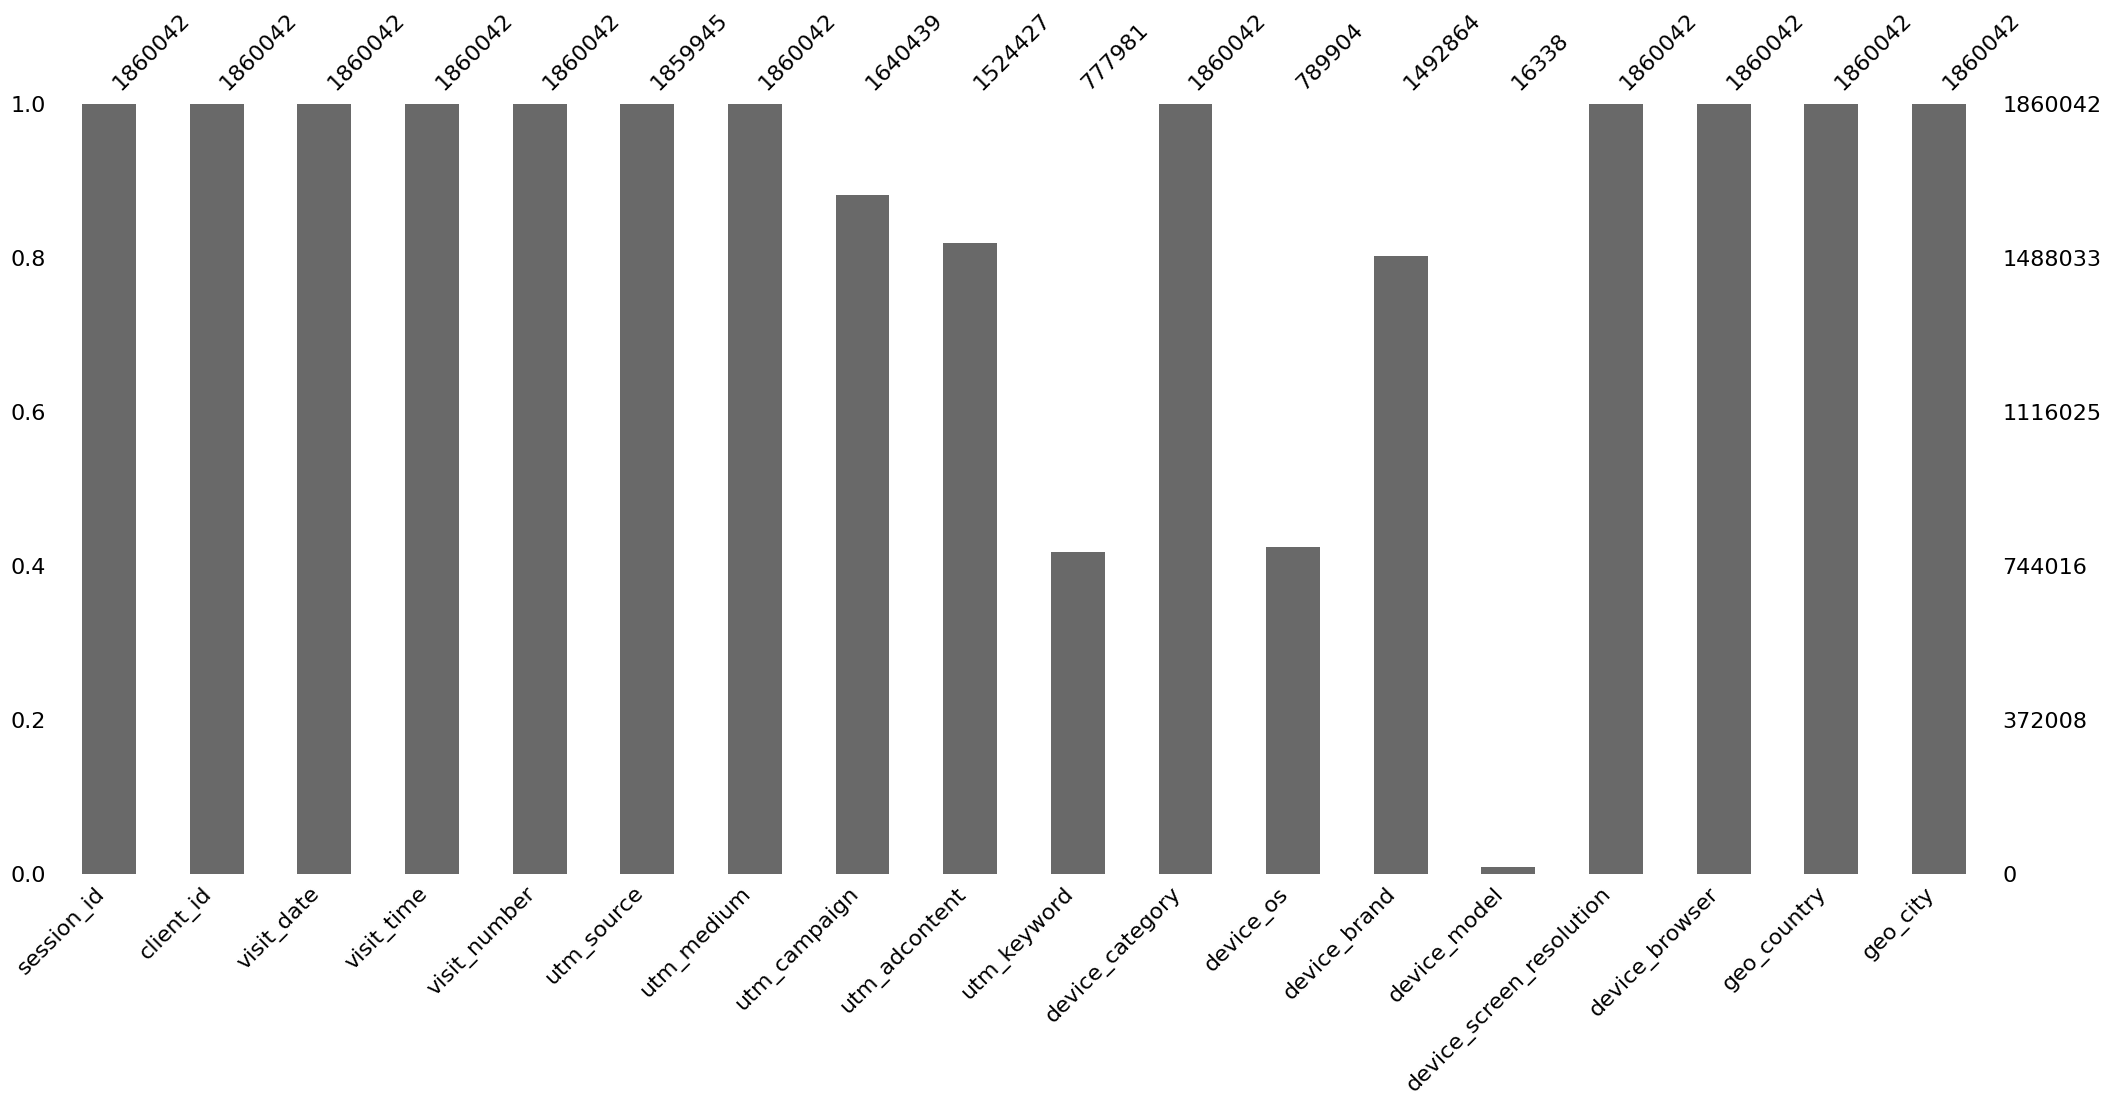

In [56]:
msno.bar(df_sessions)

In [57]:
df_sessions.drop(['device_model', 'utm_keyword', 'device_os'], axis=1, inplace=True)
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,Xiaomi,393x786,Chrome,Russia,Moscow


In [58]:
print_missing_values(df_sessions)

Процент пропущенных значений в колонках:
session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_medium                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
dtype: float64


In [59]:
df_sessions.device_brand.value_counts(dropna = False)

device_brand
Apple       551088
NaN         367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 206, dtype: int64

In [60]:
df_sessions[df_sessions.device_brand.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
28,9055505230298952295.1638478433.1638478433,2108399111.163848,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1536x864,Chrome,Russia,Balashikha
63,9055657327967035032.1629707931.1629707931,2108434524.162971,2021-08-23,11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,YaBrowser,Russia,Moscow
64,905565977351442956.1622561294.1622561294,210843509.162256,2021-06-01,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Moscow
67,9055678214400253418.1636965866.1636965866,2108439387.163696,2021-11-15,11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Saint Petersburg
73,9055788191321875859.1626006934.1626006934,2108464993.162601,2021-07-11,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1280x720,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860025,9055354507009984602.1636829278.1636829278,2108364018.163683,2021-11-13,21:47:58,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,NaN,1366x768,Firefox,Russia,Balashikha
1860027,9055363711117247375.1629176721.1629176721,2108366161.162918,2021-08-17,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,desktop,NaN,1920x1080,Chrome,Russia,(not set)
1860029,9055376699099939975.1630766214.1630766214,2108369185.163077,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Khimki
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,NaN,1920x1080,Chrome,Russia,Moscow


In [62]:
df_sessions[(df_sessions.device_category == 'desktop') & (~df_sessions.device_brand.isna())]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
7523,9088940601509803602.1637742163.1637742163,2116183890.163774,2021-11-24,11:22:43,1,kjsLglQLzykiRbcDiGcD,cpc,bJJuEXRheRIxXEaYIXqM,NaN,desktop,Apple,414x896,Chrome,Russia,Saint Petersburg
51924,983627068102568722.1639344914.1639344914,229018523.163934,2021-12-13,00:35:14,1,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,390x844,Safari,Russia,Moscow
51925,983627068102568722.1639373101.1639373101,229018523.163934,2021-12-13,08:25:01,2,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,390x844,Safari,Russia,Moscow
65676,1045963497572858422.1624963638.1624963638,243532354.162496,2021-06-29,13:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,XwZreaZvgptCcKQsSTmK,NaN,desktop,Apple,414x736,Safari,Russia,Saint Petersburg
117907,1281438154772038064.1624359344.1624359344,298358070.1624359344,2021-06-22,13:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,JwYIveaHVpeeRZloQCfF,NaN,desktop,Apple,414x736,Safari,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786620,8726071910021388931.1633081987.1633081987,2031696939.163308,2021-10-01,12:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,CdkIkBrvEVomSgvHzYvj,eOWmIGTKVDPewucDtZXG,desktop,Apple,414x896,Safari,Russia,Moscow
1842136,8974808270889198459.1637262205.1637262205,2089610386.163726,2021-11-18,22:03:25,1,kjsLglQLzykiRbcDiGcD,cpc,UjApcvnaHtkydRkrLYuv,JNHcPlZPxEMWDnRiyoBf,desktop,Xiaomi,393x873,Chrome,Russia,Moscow
1846148,8992634992214003979.1638519051.1638519051,2093760993.163852,2021-12-03,11:10:51,1,kjsLglQLzykiRbcDiGcD,cpc,labpJCBQmsoWLfQvNTak,NaN,desktop,Apple,375x812,Safari,Russia,Moscow
1852567,9021962630917622540.1622248213.1622248213,2100589366.162225,2021-05-29,03:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,desktop,Huawei,360x800,Chrome,Russia,(not set)


In [64]:
result_target = pd.merge(df_sessions, df_hits_target, on='session_id', how='inner')
result_target.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055768928391199041.1623652678.1623652678,2108460508.162365,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,360x780,Chrome,Russia,Moscow,2021-06-14,11,event,sberauto.com/cars/bf24b977?rental_page=rental_car,sub_button_click,sub_car_claim_click
1,9055789093275396095.1636395007.1636395007,2108465203.16364,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,414x736,Safari,Russia,Samara,2021-11-08,28,event,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success
2,9055789093275396095.1636395007.1636395007,2108465203.16364,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,414x736,Safari,Russia,Samara,2021-11-08,27,event,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_button_click,sub_car_claim_submit_click
3,9055789093275396095.1636395007.1636395007,2108465203.16364,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,414x736,Safari,Russia,Samara,2021-11-08,26,event,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_button_click,sub_car_claim_click
4,9055794766915104430.1624305327.1624305327,2108466524.16243,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,...,834x1112,Safari,Russia,Domodedovo,2021-06-21,55,event,sberauto.com/cars?city=1&rental_page=rental_on...,sub_submit,sub_submit_success


In [74]:
result_target.to_csv('data/first_target.csv', index=False)

In [68]:
df_hits.drop('event_value', axis=1, inplace=True)
df_hits.drop('hit_time', axis=1, inplace=True)
df_hits.drop('hit_referer', axis=1, inplace=True)
df_hits.drop('event_label', axis=1, inplace=True)

In [69]:
result_all = pd.merge(df_sessions, df_hits, on='session_id', how='inner')
result_all.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region


In [75]:
result_all.to_csv('data/first_all.csv', index=False)

In [80]:
result_target.event_action.isin(actions).sum()/len(result_target)

1.0

In [81]:
result_all.event_action.isin(actions).sum()/len(result_all)

0.006556618686675653

In [82]:
print_missing_values(result_all)

Процент пропущенных значений в колонках:
session_id                   0.000000
hit_page_path                0.000000
hit_type                     0.000000
hit_number                   0.000000
hit_date                     0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
event_category               0.000000
event_action                 0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
device_category              0.000000
utm_source                   0.004463
utm_campaign                14.018759
utm_adcontent               18.057880
device_brand                25.156646
dtype: float64


По результатам данного ноутбука:
1) были удалены фичи содержащие очень большое кол-во пропусков, оставшиеся пропуски будут обработаны позже
2) связали 2 датафрейма между собой
3) при кодировании придется отбросить большое кол-во фичей, т.к. очень многие вещи имеют уникальные значения